In [18]:
import pandas as pd 
df=pd.read_csv('d:/data/project/project_income.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wave                92857 non-null  int64  
 1   region              92857 non-null  int64  
 2   family_member       92857 non-null  int64  
 3   year_born           92857 non-null  int64  
 4   education_level     92857 non-null  int64  
 5   marriage            92857 non-null  int64  
 6   religion            92857 non-null  int64  
 7   company_size        59215 non-null  float64
 8   reason_none_worker  32147 non-null  float64
 9   gender              92857 non-null  int64  
 10  label               92857 non-null  int64  
 11  income              92857 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 8.5 MB


In [19]:
df.drop(columns=['religion'], axis=1)

,wave,region,family_member,year_born,education_level,marriage,company_size,reason_none_worker,gender,label,income
0,1,1,1,1936,2,2,NaN,8.0,1,0,614.0
1,7,1,1,1936,2,2,NaN,10.0,1,0,896.0
2,8,1,1,1936,2,2,NaN,10.0,1,0,1310.0
3,9,1,1,1936,2,2,NaN,1.0,1,0,2208.0
4,10,1,1,1936,2,2,NaN,10.0,1,0,864.0
...,...,...,...,...,...,...,...,...,...,...,...
92852,10,5,6,1967,5,1,1.0,NaN,0,1,11600.0
92853,11,5,6,1967,5,1,1.0,NaN,0,1,8327.0
92854,12,5,6,1967,5,1,1.0,NaN,0,1,7931.0
92855,13,5,5,1967,5,1,1.0,NaN,0,1,8802.0


In [20]:
df = df.fillna(0)

In [21]:
train_cols=df.columns[:-2]
X=df[train_cols]
y=df['label']
y.value_counts()

0    58337
1    34520
Name: label, dtype: int64

In [22]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler 
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [23]:
X=df_samp[train_cols]
y=df_samp['label']

In [32]:
#학습용 검증용 8:2
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [70]:
X_train.value_counts()

wave  region  family_member  year_born  education_level  marriage  religion  company_size  reason_none_worker  gender
7     3       1              1932       2                2         1         0.0           10.0                1         6
6     7       1              1927       2                2         1         0.0           10.0                1         5
      3       1              1932       2                2         1         0.0           10.0                1         5
      7       1              1922       2                2         2         0.0           10.0                1         5
10    7       1              1931       2                2         2         0.0           10.0                1         5
                                                                                                                        ..
6     1       3              1959       3                3         1         1.0           0.0                 1         1
                     

In [71]:
X_train.shape, X_test.shape

((55232, 10), (13808, 10))

In [57]:
y_train

36274    1
60080    1
1110     0
909      0
68378    1
        ..
20489    0
52464    1
66670    1
29738    0
31055    0
Name: label, Length: 55232, dtype: int64

In [73]:
len(X)

69040

In [95]:
print('y 변수의 개수')
print(y.value_counts())
print('y의 총 개수:',len(y))
print('y(0)의 학습용 :',len(y_train)/2)
print('y(1)의 학습용 :',len(y_train)/2)
print('y(0)의 검증용:',len(y_test)/2)
print('y(1)의 검증용:',len(y_test)/2)
print('학습용 총 개수:',len(y_train))
print('검증용 총 개수:',len(y_test))

y 변수의 개수
0    34520
1    34520
Name: label, dtype: int64
y의 총 개수: 69040
y(0)의 학습용 : 27616.0
y(1)의 학습용 : 27616.0
y(0)의 검증용: 6904.0
y(1)의 검증용: 6904.0
학습용 총 개수: 55232
검증용 총 개수: 13808


In [7]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test)) 

학습용: 0.79
검증용: 0.86


In [9]:
import pickle
pickle.dump(model, open('d:/data/project/project_logit.model','wb'))

In [10]:
model = pickle.load(open('d:/data/project/project_logit.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [1 1 1 1 0 0 0 1 0 0]
실제값: 41606    1
21565    0
31159    1
18970    0
27386    0
8704     0
2732     0
22562    0
7954     0
18761    0
Name: gender, dtype: int64


In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index = range(2), columns=range(2))
df_cm

,0,1
0,4427,1076
1,794,4709


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5503
           1       0.81      0.86      0.83      5503

    accuracy                           0.83     11006
   macro avg       0.83      0.83      0.83     11006
weighted avg       0.83      0.83      0.83     11006



In [13]:
#트리
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test)) 

학습용: 1.0
검증용: 0.9167726694530256


In [15]:
import pickle
pickle.dump(model, open('d:/data/project/project_tree.model','wb'))

In [16]:
model = pickle.load(open('d:/data/project/project_logit.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [1 1 1 1 0 0 0 1 0 0]
실제값: 41606    1
21565    0
31159    1
18970    0
27386    0
8704     0
2732     0
22562    0
7954     0
18761    0
Name: gender, dtype: int64


In [17]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index = range(2), columns=range(2))
df_cm

,0,1
0,4427,1076
1,794,4709


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5503
           1       0.81      0.86      0.83      5503

    accuracy                           0.83     11006
   macro avg       0.83      0.83      0.83     11006
weighted avg       0.83      0.83      0.83     11006



In [19]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=10)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [20]:
print('학습용:',forest.score(X_train, y_train)) 
print('검증용:',forest.score(X_test, y_test)) 

학습용: 0.9999772851172088
검증용: 0.9443939669271306


In [21]:
pickle.dump(model, open('d:/data/project/project_rf.model','wb'))

In [22]:

model = pickle.load(open('d:/data/project/project_rf.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10]) 
print('실제값:',y_test[:10]) 

예측값: [1 1 1 1 0 0 0 1 0 0]
실제값: 41606    1
21565    0
31159    1
18970    0
27386    0
8704     0
2732     0
22562    0
7954     0
18761    0
Name: gender, dtype: int64


In [23]:
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index = range(2), columns=range(2))
df_cm

,0,1
0,4427,1076
1,794,4709


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5503
           1       0.81      0.86      0.83      5503

    accuracy                           0.83     11006
   macro avg       0.83      0.83      0.83     11006
weighted avg       0.83      0.83      0.83     11006



[0.7172451390150827, 0.7011630019989097, 0.7350536071233873, 0.7323278211884426, 0.7464110485189897, 0.7453207341450118, 0.7508631655460658, 0.7494094130474287, 0.7555878611666363, 0.754770125386153]
최적의 k: 9
최적의 정확도: 0.7555878611666363


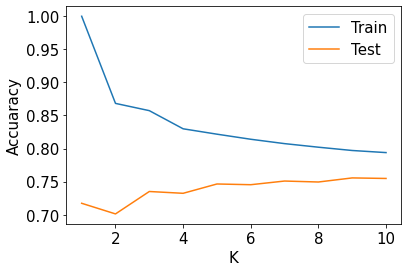

In [25]:
#최근접 이웃
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

train_rate = []
test_rate = []

neighbors = range(1,11)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test, y_test))

    
plt.rcParams['font.size']=15
plt.plot(neighbors, train_rate, label = 'Train')
plt.plot(neighbors, test_rate, label = 'Test')
plt.ylabel('Accuaracy')
plt.xlabel('K')
plt.legend()

print(test_rate)
max_rate = max(test_rate)
idx = np.argmax(test_rate)
print('최적의 k:', idx+1)
print('최적의 정확도:', max_rate)

In [26]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [27]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test)) 

학습용: 0.7970425222605851
검증용: 0.7555878611666363


In [28]:
import pickle
pickle.dump(model, open('d:/data/project/project_knn.model','wb'))

In [29]:
model = pickle.load(open('d:/data/project/project_knn.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [1 1 1 0 1 0 0 1 0 0]
실제값: 41606    1
21565    0
31159    1
18970    0
27386    0
8704     0
2732     0
22562    0
7954     0
18761    0
Name: gender, dtype: int64


In [30]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index = range(2), columns=range(2))
df_cm

,0,1
0,3947,1556
1,1134,4369


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5503
           1       0.74      0.79      0.76      5503

    accuracy                           0.76     11006
   macro avg       0.76      0.76      0.76     11006
weighted avg       0.76      0.76      0.76     11006



In [33]:
#ANN(인공신경망)
from sklearn.neural_network import MLPClassifier
%matplotlib inline

train_rate = []
test_rate = []
for i in range(100,301,100):
    for j in range(100,301,100):
        model = MLPClassifier(random_state=100, hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train,y_train)
        train_rate.append(model.score(X_train,y_train))
        test_rate.append(model.score(X_test,y_test))

idx:  8
최적의 정확도: 0.9020534254043249
300 300


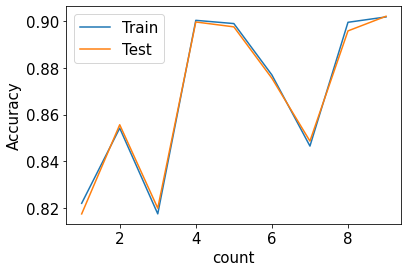

In [34]:
plt.rcParams['font.size'] = 15
plt.plot(range(1,10),train_rate,label = 'Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

max_rate = max(test_rate)
idx = np.where(test_rate == max_rate)[0][0]
print('idx: ',idx)
print('최적의 정확도:',max_rate)
cnt = 0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
            break
        cnt+=1

In [35]:
model = MLPClassifier(hidden_layer_sizes=[300,300],random_state=100)
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[300, 300], random_state=100)

In [36]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test)) 

학습용: 0.9017581319280392
검증용: 0.9020534254043249


In [37]:
import pickle
pickle.dump(model, open('d:/data/project/project_ann.model','wb'))

In [38]:
model = pickle.load(open('d:/data/project/project_ann.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [1 1 1 1 0 0 0 0 0 0]
실제값: 41606    1
21565    0
31159    1
18970    0
27386    0
8704     0
2732     0
22562    0
7954     0
18761    0
Name: gender, dtype: int64


In [40]:
pred = model.predict(X_test)

cm = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index = range(2), columns = range(2))
df_cm


,0,1
0,4860,643
1,435,5068


In [42]:
#svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

SVC()

In [43]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test))

학습용: 0.7277166999818281
검증용: 0.7279665636925313


In [44]:
%matplotlib inline

train_rate = []
test_rate = []
c_values = [0.1,1,10,100]
g_values = [0.01,0.1,1]

for n in c_values:
    for g in g_values:
        model = SVC(C=n, gamma=g,random_state=10)
        model.fit(X_train,y_train)
        train_rate.append([n,g,model.score(X_train,y_train)])
        test_rate.append([n,g,model.score(X_test,y_test)])

train_arr = np.array(train_rate)
test_arr = np.array(test_rate)
max_rate = np.max(test_arr[:,2])
idx = np.where(test_arr[:,2])
print('최적의 c:',test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최적의 정확도:', test_rate[idx][2])

plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2],
label="Train")
plt.plot(range(len(test_rate)), test_arr[:,2],
label="Test")
plt.ylabel("Accuracy")
plt.legend()

TypeError: list indices must be integers or slices, not tuple

In [ ]:
model = SVC(C=, gamma=)
model.fit(X_train, y_train)

In [ ]:
print('학습용:',model.score(X_train, y_train)) 
print('검증용:',model.score(X_test, y_test)) 

In [ ]:
import pickle
pickle.dump(model, open('d:/data/project/project_svm.model','wb'))

In [ ]:
model = pickle.load(open('d:/data/project/project_svm.model','rb'))
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

In [ ]:
pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10),columns=range(10))

df_cm

In [ ]:
import statsmodels.api as sm 
model=sm.Logit(y_samp,X_samp)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.398505
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.425     
Dependent Variable:   gender           AIC:              43881.4453
Date:                 2022-06-29 10:28 BIC:              43979.5173
No. Observations:     55030            Log-Likelihood:   -21930.   
Df Model:             10               LL-Null:          -38144.   
Df Residuals:         55019            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
wave                0.0441   0.0032  13.7659 0.0000  0.0378  0.0503
region             -0.0372   0.0060  -6.2